In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_bezier(xys):
    # xys should be a sequence of 2-tuples (Bezier control points)
    n = len(xys)
    combinations = pascal_row(n-1)
    def bezier(ts):
        # This uses the generalized formula for bezier curves
        # http://en.wikipedia.org/wiki/B%C3%A9zier_curve#Generalization
        result = []
        for t in ts:
            tpowers = (t**i for i in range(n))
            upowers = reversed([(1-t)**i for i in range(n)])
            coefs = [c*a*b for c, a, b in zip(combinations, tpowers, upowers)]
            result.append(
                tuple(sum([coef*p for coef, p in zip(coefs, ps)]) for ps in zip(*xys)))
        return result
    return bezier
def pascal_row(n):
    # This returns the nth row of Pascal's Triangle
    result = [1]
    x, numerator = 1, n
    for denominator in range(1, n//2+1):
        # print(numerator,denominator,x)
        x *= numerator
        x /= denominator
        result.append(x)
        numerator -= 1
    if n&1 == 0:
        # n is even
        result.extend(reversed(result[:-1]))
    else:
        result.extend(reversed(result)) 
    return result

In [3]:
# from PIL import Image
# from PIL import ImageDraw
# if __name__ == '__main__':
#     im = Image.new('RGBA', (100, 100), (0, 0, 0, 0)) 
#     draw = ImageDraw.Draw(im)
#     ts = [t/100.0 for t in range(101)]
#     xys = [(50, 100), (80, 80), (100, 50)]
#     bezier = make_bezier(xys)
#     points = bezier(ts)
#     print(len(points))
#     xys = [(100, 50), (100, 0), (50, 0), (50, 35)]
#     bezier = make_bezier(xys)
#     points.extend(bezier(ts))
#     print(len(points))
#     xys = [(50, 35), (50, 0), (0, 0), (0, 50)]
#     bezier = make_bezier(xys)
#     points.extend(bezier(ts))
#     print(len(points))
#     xys = [(0, 50), (20, 80), (50, 100)]
#     bezier = make_bezier(xys)
#     points.extend(bezier(ts))
#     draw.polygon(points)


In [4]:
ts = [t/100.0 for t in range(101)]
xys=np.array([[53.639,1467.942],[55.008, 1482.681],[55.60343482, 1495.43155],[57.77934222, 1510.693],[60.346,1526.88475]])
bezier = make_bezier(xys)
points = bezier(ts)
points=np.array(points)
points

array([[  53.639     , 1467.942     ],
       [  53.69330524, 1468.53038487],
       [  53.74673821, 1469.11649073],
       [  53.79935411, 1469.70042338],
       [  53.85120734, 1470.28228715],
       [  53.90235139, 1470.86218493],
       [  53.95283895, 1471.44021812],
       [  54.00272184, 1472.0164867 ],
       [  54.05205101, 1472.59108915],
       [  54.1008766 , 1473.16412253],
       [  54.14924786, 1473.73568241],
       [  54.19721322, 1474.3058629 ],
       [  54.24482024, 1474.87475669],
       [  54.29211564, 1475.44245496],
       [  54.33914528, 1476.00904747],
       [  54.38595418, 1476.5746225 ],
       [  54.4325865 , 1477.13926687],
       [  54.47908556, 1477.70306596],
       [  54.52549382, 1478.26610367],
       [  54.5718529 , 1478.82846244],
       [  54.61820355, 1479.39022328],
       [  54.66458569, 1479.9514657 ],
       [  54.71103838, 1480.51226779],
       [  54.75759983, 1481.07270614],
       [  54.8043074 , 1481.63285592],
       [  54.85119761, 14

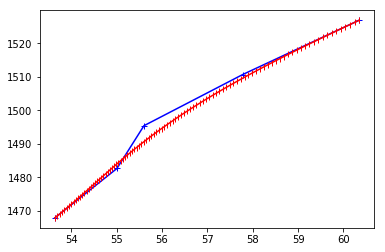

In [5]:
x_truth=points[:,0]
y_truth=points[:,1]
# plt.plot(s_tol[:,0],s_tol[:,1],'+')
plt.plot(xys[:,0],xys[:,1], label = "val", color='blue', marker='+')
plt.plot(x_truth,y_truth, label = "truth", color='red', marker='|')
# plt.plot(x_val,y_val_ran, label = "ran", color='green', marker='|')
# plt.scatter(x1,y1,s=20,c=T,alpha=0.5)
plt.show()